Creating a Single-Layer Neural Network


In [1]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/SomervilleHappinessSurvey2015.csv')
data.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
x = torch.tensor(data.iloc[:,1:].values).float()
y = torch.tensor(data.iloc[:,:1].values).float()

In [4]:
model = nn.Sequential(nn.Linear(6, 1),
                      nn.Sigmoid())

In [5]:
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [6]:
losses = []
for i in range(100):
    y_pred = model(x)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i%10 == 0:
        print(loss.item())

0.43613865971565247
0.330939918756485
0.2638051509857178
0.24934566020965576
0.2510071098804474
0.24725835025310516
0.2446811944246292
0.24309661984443665
0.2417440563440323
0.24051088094711304


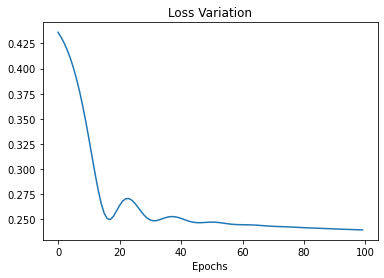

In [7]:
plt.plot(range(0,100), losses)
plt.title('Loss Variation')
plt.xlabel('Epochs')
plt.show()

Prediction of the release year of a song from audio features. Songs are mostly western, commercial tracks ranging from 1922 to 2011, with a peak in the year 2000s. See https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD



In [9]:
import pandas as pd

In [10]:
data = pd.read_csv("/content/YearPredictionMSD.txt", nrows=50000)
data.head()

,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34.56445,-5.07092,-47.75605,64.81513,-97.42948,-12.59418,55.23699,28.85657,54.53513,-31.97077,20.03279,-8.07892,-55.12617,26.58961,-10.27183,-30.64232,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,-4.69088,2.49578,-3.02468,7.69273,1004.95615,785.06709,591.99232,495.75332,291.38165,434.08355,291.55265,303.58860,216.12189,126.10703

In [11]:
cols = data.columns

num_cols = data._get_numeric_data().columns

list(set(cols) - set(num_cols))

[]

In [12]:
data.isnull().sum().sum()

0

In [13]:
outliers = {}
for i in range(data.shape[1]):
    min_t = data[data.columns[i]].mean() - (3 * data[data.columns[i]].std())
    max_t = data[data.columns[i]].mean() + (3 * data[data.columns[i]].std())
    count = 0
    for j in data[data.columns[i]]:
        if j < min_t or j > max_t:
            count += 1
    percentage = count/data.shape[0]
    outliers[data.columns[i]] = "%.3f" % percentage

print(outliers)

{'2001': '0.019', '49.94357': '0.010', '21.47114': '0.011', '73.07750': '0.011', '8.74861': '0.015', '-17.40628': '0.008', '-13.09905': '0.010', '-25.01202': '0.010', '-12.23257': '0.010', '7.83089': '0.011', '-2.46783': '0.005', '3.32136': '0.010', '-2.31521': '0.010', '10.20556': '0.015', '611.10913': '0.017', '951.08960': '0.016', '698.11428': '0.016', '408.98485': '0.014', '383.70912': '0.016', '326.51512': '0.013', '238.11327': '0.016', '251.42414': '0.015', '187.17351': '0.013', '100.42652': '0.015', '179.19498': '0.013', '-8.41558': '0.018', '-317.87038': '0.017', '95.86266': '0.017', '48.10259': '0.018', '-95.66303': '0.017', '-18.06215': '0.016', '1.96984': '0.015', '34.42438': '0.017', '11.72670': '0.016', '1.36790': '0.015', '7.79444': '0.016', '-0.36994': '0.017', '-133.67852': '0.017', '-83.26165': '0.016', '-37.29765': '0.015', '73.04667': '0.017', '-37.36684': '0.017', '-3.13853': '0.015', '-24.21531': '0.014', '-13.23066': '0.016', '15.93809': '0.015', '-18.60478': '0.0

In [14]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [15]:
X = (X - X.mean())/X.std()
X.head()

,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,0.880879,0.321962,1.763731,0.717095,-0.165521,-1.188885,0.777886,0.122554,1.420538,0.401205,0.541267,-0.259089,0.495452,-0.203702,-1.079213,-0.955837,-0.272791,-0.809076,0.460386,-0.478540,-0.347116,-0.306400,-0.793404,0.169031,-0.200020,-0.157899,0.394173,0.733171,-0.710541,-0.980179,0.121368,0.296396,0.324096,-0.560552,1.070082,-0.423903,-0.609403,-0.361361,0.204129,0.892177,...,0.231097,-0.359946,0.831296,-0.548990,-0.570233,0.229858,-0.076641,-0.313917,-0.505687,-0.255141,-0.787142,-0.399120,0.342937,-0.885842,0.179186,0.087009,-0.915254,0.128528,0.137582,-0.812481,0.222551,0.556169,0.253342,0.124375,0.612456,-0.493892,-0.238845,-0.124116,0.405369,-0.712876,-0.316624,0.301428,-0.063607,0.031858,-0.655117,-0.443909,0.536523,0.573188,0.209887,1.155167
1,1.251490,0.588938,1.350633,0.745954,0.000844,-0.703392,-0.066786,-0.057405,1.163643,-0.090067,0.658575,-0.200284,-1.166068,-0.987148,-0.749983,-0.832562,-1.172582,-0.649550,-0.690076,-0.734540,-1.328114,-0.982157,-0.780600,-0.610881,-0.397686,-0.479825,-0.183646,0.079156,-0.227650,-0.242213,-0.311668,-0.209836,-0.121681,0.583564,0.148019,-0.406470,-0.066617,-0.912418,0.099843,-0.051928,...,0.124929,-0.153315,0.176393,-0.150086,0.019127,-0.041846,0.295101,0.036204,-0.338390,0.207070,-0.103820,0.529728,0.052233,-0.406269,-1.057179,-0.027956,-0.148825,0.466345,-0.293936,-0.028398,0.763761,0.072726,-0.074445,0.879246,-0.148850,0.017121,-0.043591,-0.394438,0.103900,0.310218,-0.399174,0.567644,-0.749504,-0.301981,-0.034065,0.227067,-0.528409,-0.335337,0.109956,-0.095868
2,0.800152,-0.082232,0.794814,0.081837,0.336234,-1.295356,0.517344,-1.062911,-0.029674,-1.282277,1.543418,-0.703935,0.191754,-0.136090,-1.005424,-0.954182,-0.346163,-1.133064,-0.689442,-0.857494,-0.690563,-0.894095,-1.023974,-0.930125,0.291581,-0.153381,0.172687,-0.325637,-0.789490,-0.231453,0.092615,-0.675182,-0.665916,-0.766503,0.493301,-0.341152,-0.320412,-0.477032,0.387870,-0.117385,...,-0.022456,-0.879503,-0.105514,0.123909,0.779818,-0.887510,-0.068507,-0.068547,0.390979,0.067866,-0.416689,0.066912,-0.307018,0.630057,-0.238823,-0.228997,-0.862767,-0.299792,-0.528954,0.054746,-0.440613,0.646260,0.317181,0.844579,-0.233192,-0.889848,0.710454,-0.069040,0.474330,0.467833,0.590604,-0.583408,-0.472125,-0.904160,-0.820134,0.577363,-0.282029,0.412325,0.961849,0.789309
3,1.253665,0.794815,1.671843,0.442447,-0.411085,-0.569418,-0.712183,-0.941499,0.836420,-0.160616,0.402684,-0.035891,0.627335,-0.874750,-0.915273,-1.080889,-1.003246,-0.937798,-0.861282,-0.618831,-0.954505,-0.532272,-1.034322,-0.536284,-0.315640,-0.344573,0.472375,-0.237568,-0.520748,-0.388291,-0.177734,-0.399613,0.161421,-0.319853,0.880971,-0.571169,-0.183920,-0.927537,0.605663,0.025934,...,0.407703,-0.240919,0.227148,-0.229798,-0.378762,-0.518222,-0.202235,-0.502330,-0.555611,0.057171,-0.472107,-0.052127,-0.103587,0.273310,-0.167232,-0.048073,-0.506859,0.323347,-1.260653,-0.326238,0.258924,0.100562,0.500695,-0.321306,0.645928,-0.104252,-0.114144,-0.037956,0.466306,-0.481972,-0.182966,0.090289,0.196757,-0.601567,-0.123588,-0.223947,0.429010,0.260871,0.195160,1.238092
4,1.183286,-0.038208,2.390821,1.296056,-0.840430,-0.741985,1.612891,-0.415910,-0.021514,-1.025315,0.604104,-0.664561,-1.155860,-0.810874,-0.935158,-0.83

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_shuffle = X.sample(frac=1, random_state=0)
Y_shuffle = Y.sample(frac=1, random_state=0)

In [18]:
x_new, x_test, y_new, y_test = train_test_split(X_shuffle, Y_shuffle, test_size=0.2, random_state=0)
dev_per = x_test.shape[0]/x_new.shape[0]
x_train, x_dev, y_train, y_dev = train_test_split(x_new, y_new, test_size=dev_per, random_state=0)

In [19]:
import torch
import torch.nn as nn
torch.manual_seed(0)

In [20]:
x_train = torch.tensor(x_train.values).float()
y_train = torch.tensor(y_train.values).float()

x_dev = torch.tensor(x_dev.values).float()
y_dev = torch.tensor(y_dev.values).float()

x_test = torch.tensor(x_test.values).float()
y_test = torch.tensor(y_test.values).float()

In [21]:
model = nn.Sequential(nn.Linear(x_train.shape[1],10),
                      nn.ReLU(),
                      
                      nn.Linear(10,7),
                      nn.ReLU(),
                      
                      nn.Linear(7,5),
                      nn.ReLU(),
                     
                      nn.Linear(5,1))

In [22]:
loss_function = torch.nn.MSELoss()

In [23]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [24]:
for i in range(3000):
    y_pred = model(x_train).squeeze()
    loss = loss_function(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i%250 == 0:
        print(i, loss.item())

0 3994117.5
250 198669.84375
500 14069.74609375
750 1491.8251953125
1000 449.419677734375
1250 216.93295288085938
1500 142.8686981201172
1750 114.00255584716797
2000 101.55926513671875
2250 95.59891510009766
2500 92.46050262451172
2750 90.70108032226562


In [25]:
pred = model(x_test[0])
print("Ground truth:", y_test[0].item(), "Prediction:", pred.item())

Ground truth: 1998.0 Prediction: 2002.5091552734375
